# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [35]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [36]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

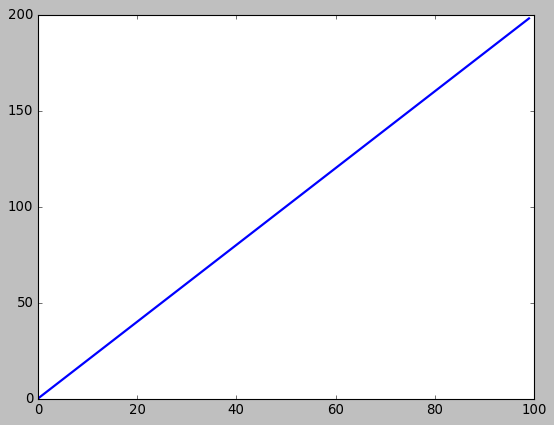

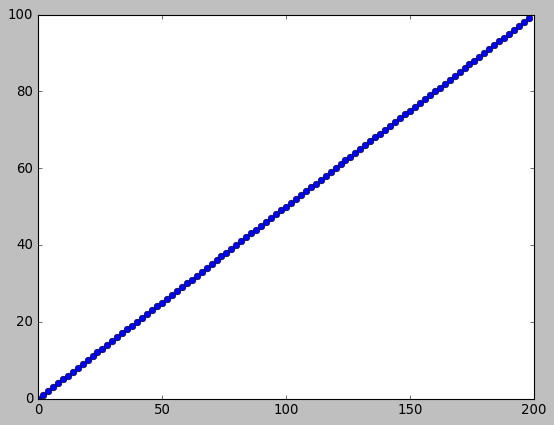

In [37]:
# Method 1
plt.plot(x,y, linewidth = 2)
plt.show()

plt.plot(y,x, 'bo ')
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

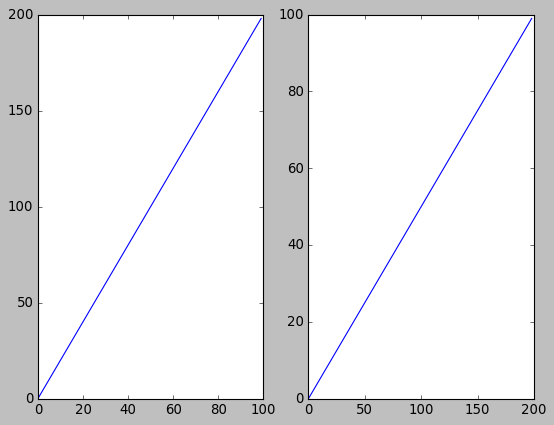

In [38]:
# Method 2
plot_options, (chart1, chart2) = plt.subplots(nrows=1,ncols=2)

chart1.plot(x,y)
chart2.plot(y,x)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

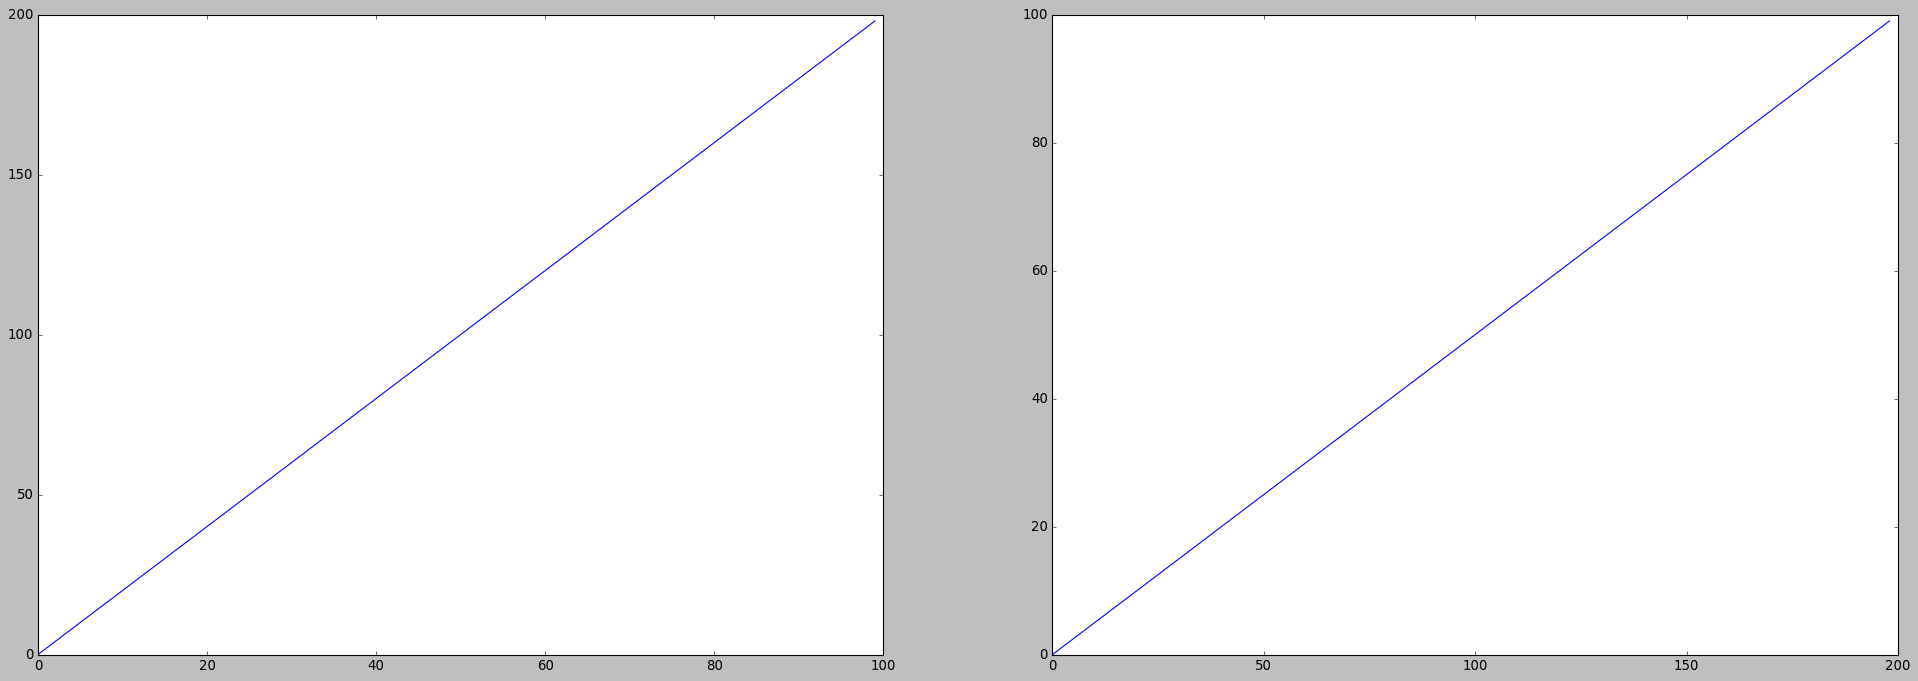

In [39]:
# your code
plot_options, (chart1, chart2) = plt.subplots(nrows=1,ncols=2, figsize = (30,10))

chart1.plot(x,y)
chart2.plot(y,x)

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

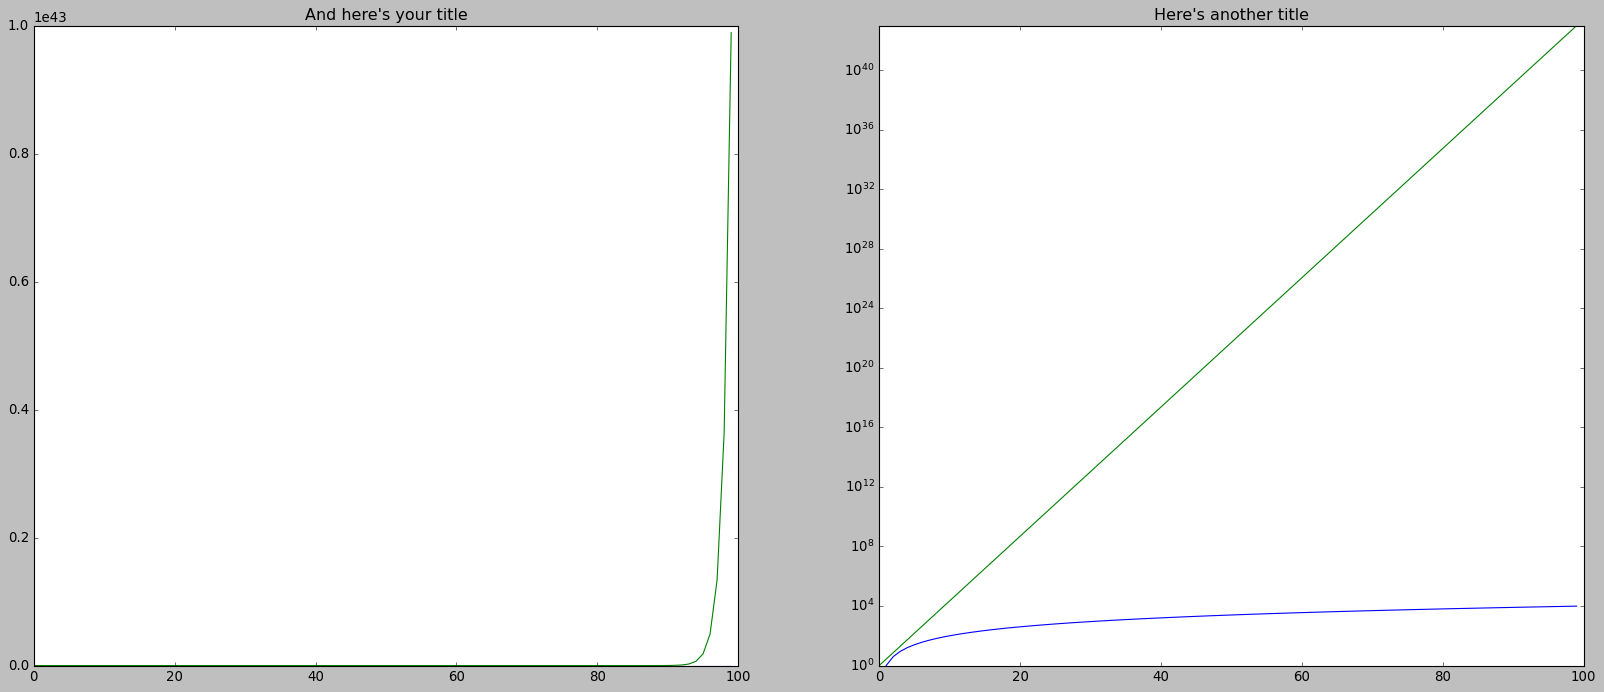

In [40]:
# your code here
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
ax1.plot(x,x**2, x, np.exp(x))
ax1.set_label("Here's your label")
ax1.set_title("And here's your title")

ax2.plot(x, x**2, x, np.exp(x))
ax2.set_yscale("log")
ax2.set_title("Here's another title")
ax2.set_label("here's another label")
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

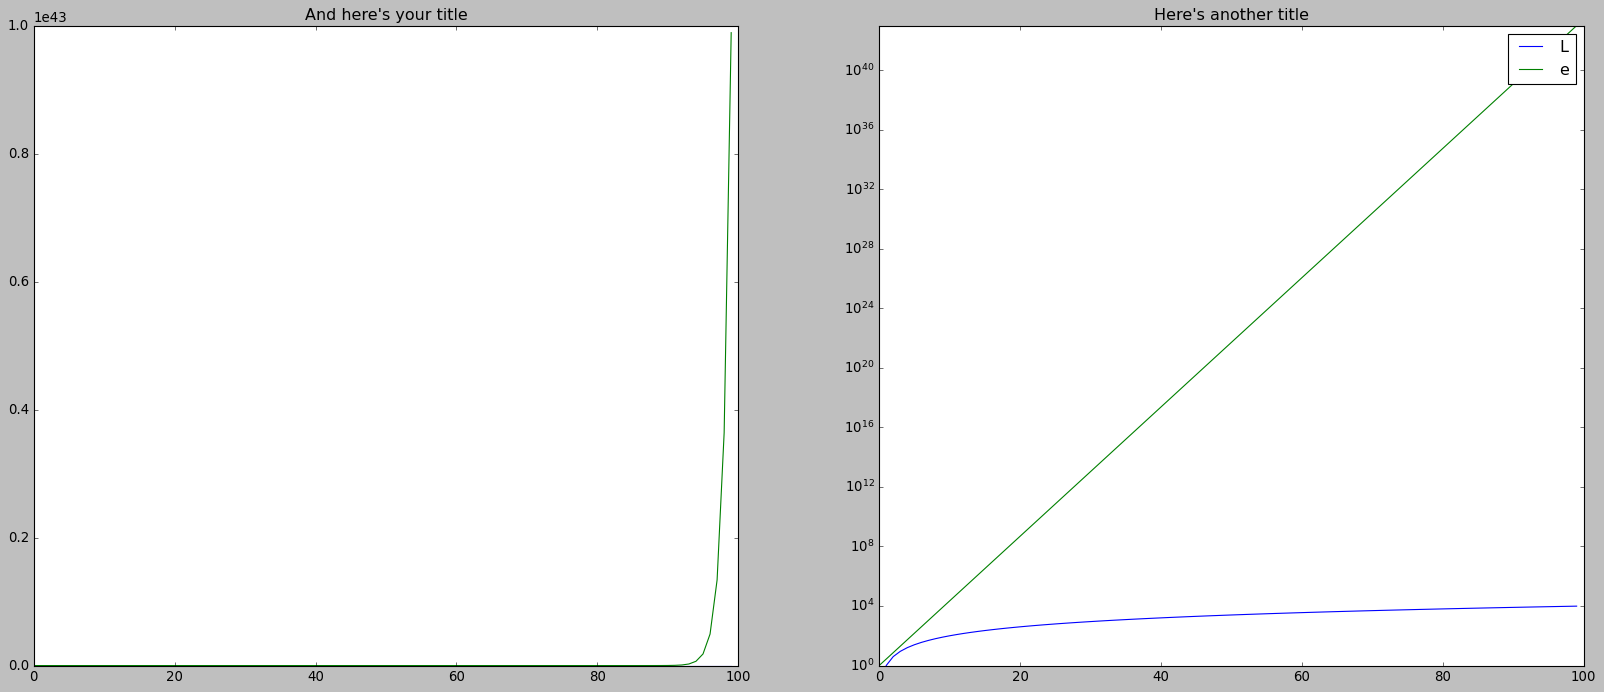

In [41]:
# your code here
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,10))
ax1.plot(x,x**2, x, np.exp(x))
ax1.set_label("Here's your label")
ax1.set_title("And here's your title")

ax2.plot(x, x**2, x, np.exp(x))
ax2.set_yscale("log")
ax2.set_title("Here's another title")
ax2.set_label("here's another label")
ax2.legend("Legend for the legendary")

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [42]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


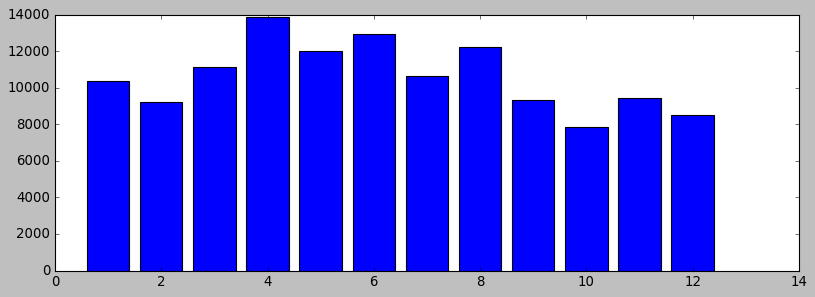

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


<Figure size 640x480 with 0 Axes>

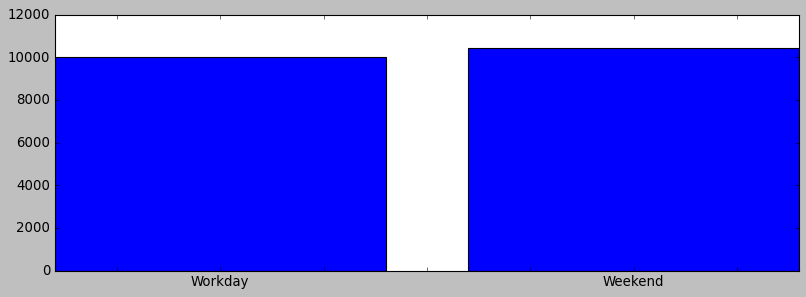

In [43]:
# MEDIAN STEPS BY MONTH_ENCODED

steps_month = fitbit.groupby('Months_encoded').agg({'Steps':'median'}).reset_index()
display(steps_month)
plt.figure(figsize= (12,4))
plt.bar(steps_month['Months_encoded'], steps_month['Steps'])
plt.show()
plt.savefig('figures/steps_by_month.png')

# MEDIAN STEPS BY WORK_OR_WEEKEND
weekly_steps = fitbit.groupby("Work_or_Weekend").agg({"Steps": "median"}).reset_index()
display(weekly_steps)
plt.figure(figsize = (12,4))
plt.bar(weekly_steps["Work_or_Weekend"],weekly_steps["Steps"])
plt.xticks([-0.25,0,0.25,0.5,0.75,1,1.25],["","Workday","","","",'Weekend',""])
plt.show()
fig.savefig("figures/Work_Weekend_steps.png")


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

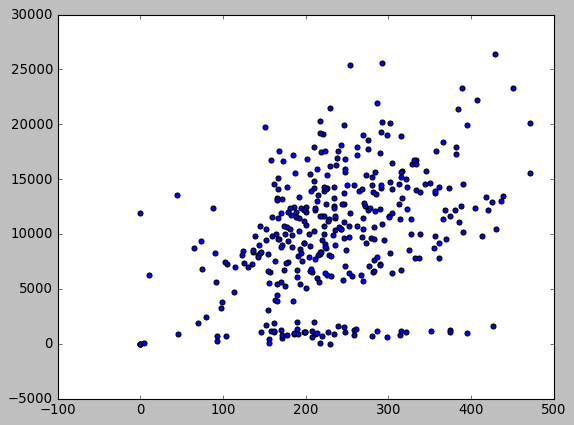

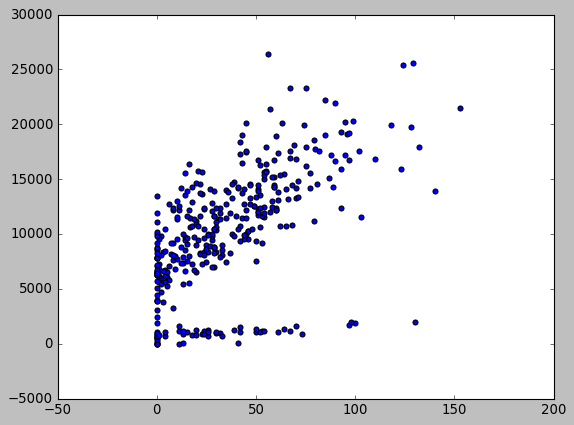

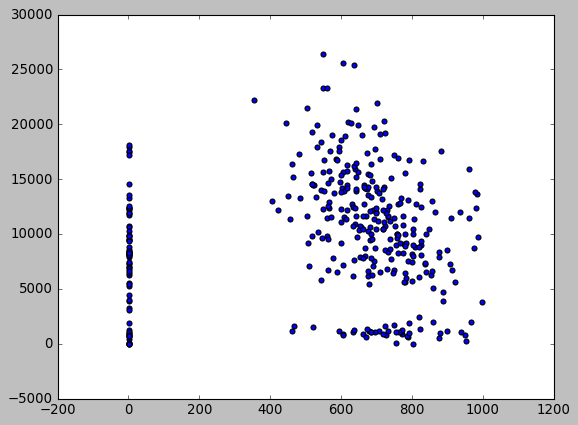

In [44]:
# your code here
minutes = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for item in minutes:
    plt.scatter(fitbit[item], fitbit['Steps'])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [45]:
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [46]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [47]:
# NUMERICAL VARIABLES
numerical = titanic.select_dtypes(exclude=['object']).columns
numerical

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [48]:
# CATEGORICAL VARIABLES
categorical = titanic.select_dtypes('object')#.columns
categorical

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [49]:
# your code here
plt.style.use('classic')
plt.figure(figsize = (12,6))
plt.show()

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Frequency'>

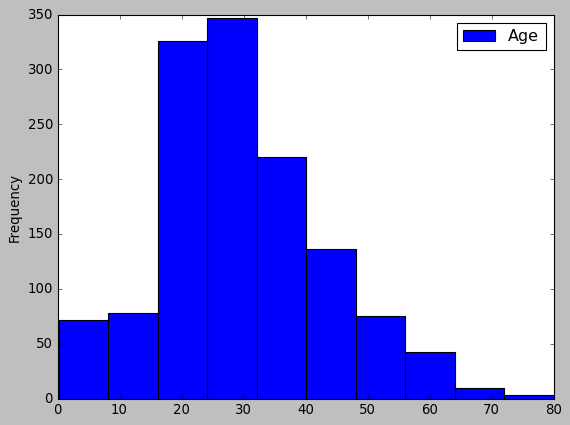

In [50]:
# your code here
titanic.plot( y = 'Age', kind = 'hist')
# or
#plt.hist(titanic['Age'])
#plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

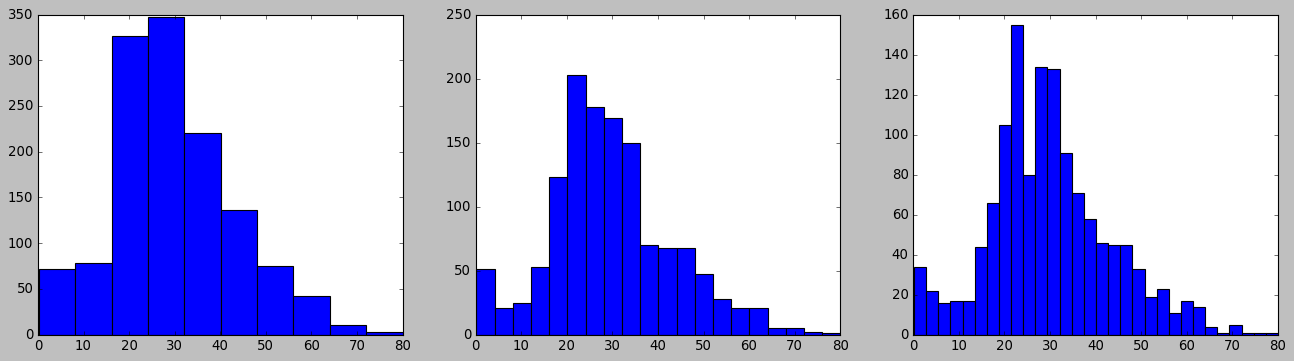

In [51]:
fig, [bins_10, bins_20, bins_30] = plt.subplots(1,3, figsize = (20,5))
bins_10.hist(titanic['Age'],10)
bins_20.hist(titanic['Age'],20)
bins_30.hist(titanic['Age'],30)
plt.show()

#### How does the bin size affect your plot?

In [52]:
#due to the change in the the bars we can see all the different ages

#### Use seaborn to show the distribution of column `Age`.

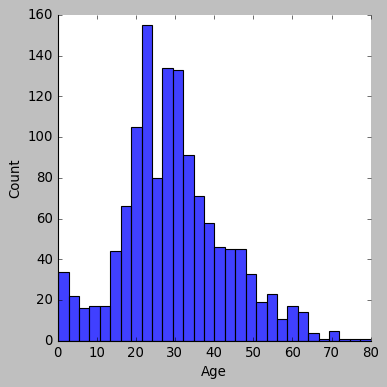

In [53]:
# your code here
sns.displot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

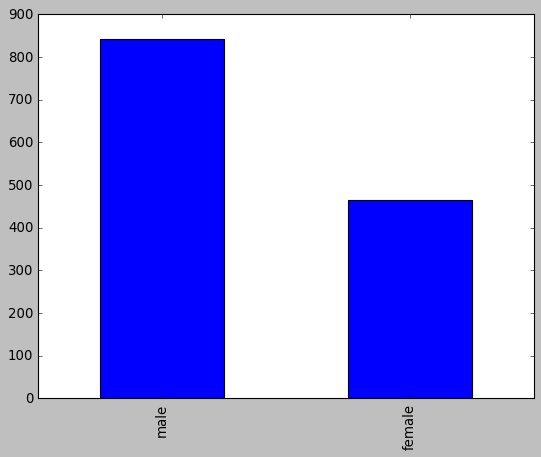

In [54]:
# Method 1 - matplotlib
gender = titanic['Gender'].value_counts().plot(kind = 'bar')
plt.show()

c:\Users\Jani\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

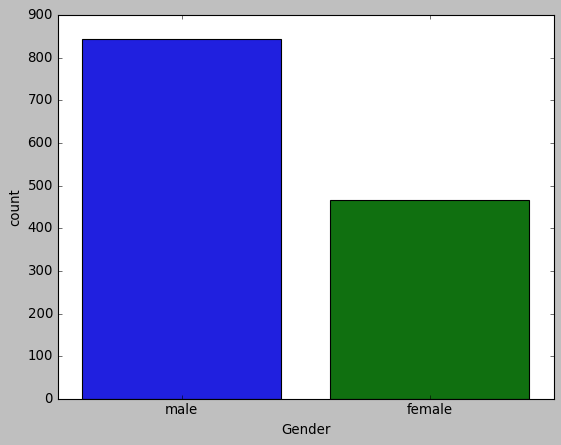

In [55]:
# Method 2 - seaborn
sns.countplot(titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

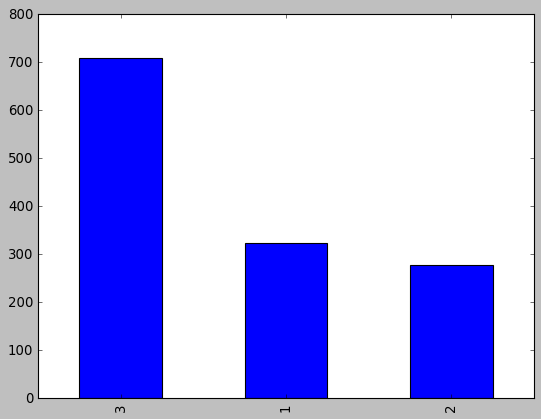

In [56]:
# your code here
titanic['Pclass'].value_counts().plot(kind = 'bar')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<function matplotlib.pyplot.show(close=None, block=None)>

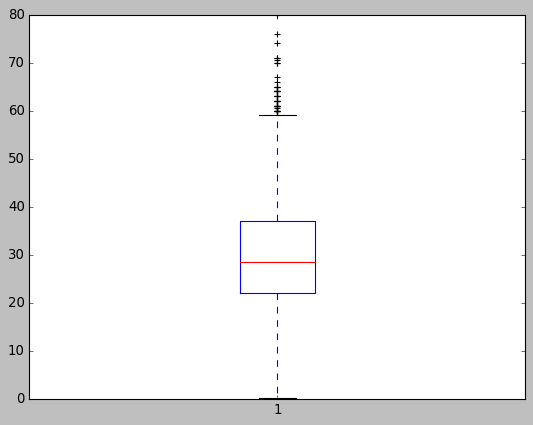

In [57]:
# your code here
plt.boxplot(titanic['Age'])
plt.show

In [58]:
#This summarizes it better

#### What does the last plot tell you about the feature `Age`?

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

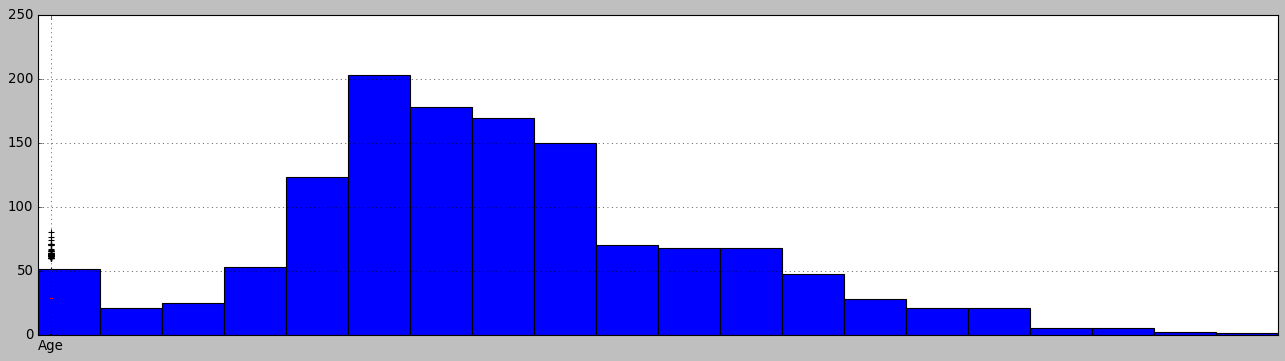

In [59]:
plt.figure(figsize =(20,5))
titanic.boxplot(column='Age')
plt.hist(titanic['Age'],20,orientation='vertical', color='blue')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [60]:
#your comment here

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

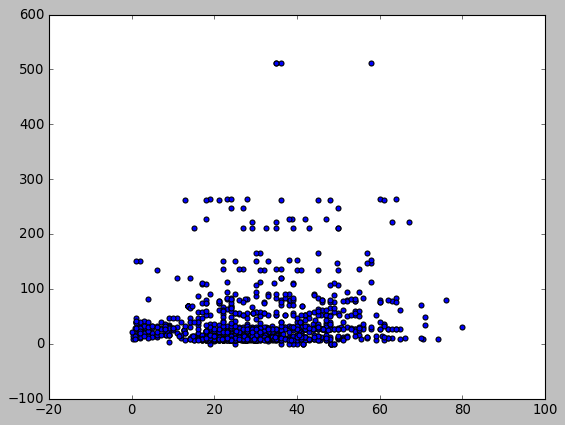

In [61]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'],titanic['Fare'])

<AxesSubplot:xlabel='Age', ylabel='Fare'>

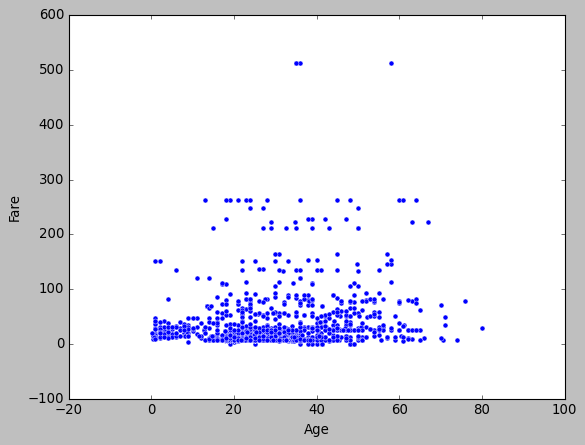

In [62]:
# Method 2 - seaborn
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare')


#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

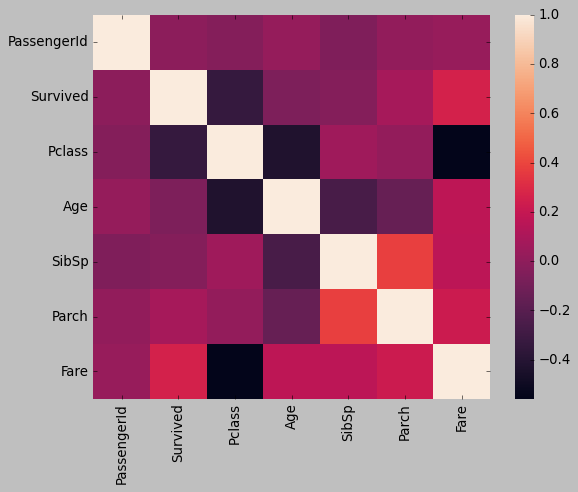

In [63]:
# your code here
sns.heatmap(titanic.corr())

#### What are the most correlated features?

In [64]:
# negative correlation between Pclass & Fare, Pclass & Age, Pclass & Survived
#somewhat positive corr between Parch & SibSp, Survived & Fare.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

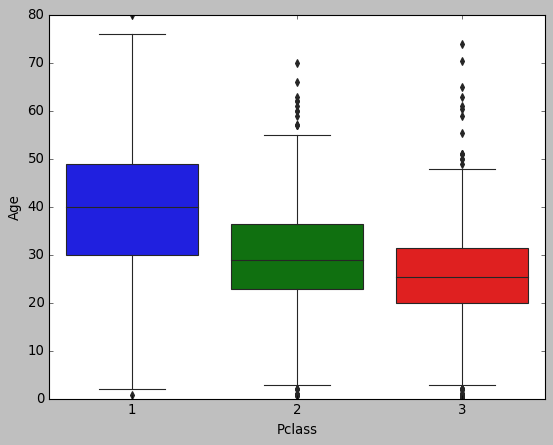

In [65]:
# your code here
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

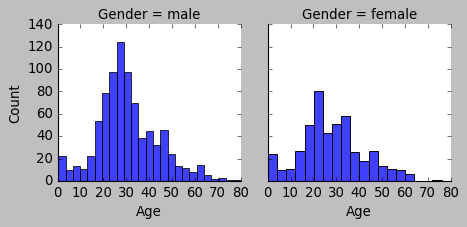

In [66]:
# your code here
gender = sns.FacetGrid(titanic, col = "Gender")
gender.map(sns.histplot, "Age")
plt.show()